In [160]:
from importlib import reload
import cohort_model
reload(cohort_model)

<module 'cohort_model' from '/Users/oda/Dropbox/1 Prosjekt/risky_ageing/cohort_model.py'>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

from cohort_model import run_simulation, plot_fig_1, MUTANT_CAP, MUTANT_WILD, HYP_WILD_TYPE

# Figure 1

In [ ]:
# Set simulation parameters

number_of_individuals = 1000
cohort_survivorship = np.ones(number_of_individuals)

alpha = 0.000222 
kappa = 0.033 
epsilon = 0.04
hazard_rate_wild_type = 0.04015625 # 0.03855/(1 - epsilon) #TODO: Vise hvordan 0.03855 ble funnet
hazard_rate_parameters = dict(epsilon=epsilon, hazard_rate_wild_type=hazard_rate_wild_type, alpha=alpha, kappa=kappa)

number_of_repetitions = 100

t_m_captivity = 201
t_m_wild = 100
t_m_hyp_wt = 100

In [ ]:
%%time
captivity_population = run_simulation(number_of_repetitions, cohort_survivorship, hazard_rate_parameters, t_m_captivity, MUTANT_CAP)

In [ ]:
%%time
wild_population = run_simulation(number_of_repetitions, cohort_survivorship, hazard_rate_parameters, t_m_wild, MUTANT_WILD)

In [ ]:
%%time
hyp_wt_population = run_simulation(number_of_repetitions, cohort_survivorship, hazard_rate_parameters, t_m_hyp_wt, HYP_WILD_TYPE)

In [ ]:
plot_fig_1(t_m_captivity, t_m_wild, t_m_hyp_wt, captivity_population, wild_population, hyp_wt_population)

# Figure 2

In [7]:
%%time
number_of_individuals = 1000
number_of_repetitions = 1000
t_m = 100

kappa = 0.033
alpha = 0.000222

epsilons = np.array([0.01, 0.02, 0.03, 0.04])
hazard_rates_wt = np.array([0.03893939, 0.03933673, 0.039742268,0.04015625]) # based on previous least-squares fitting: (1-epsilon)p_wt = 0.0385499

cohort = np.ones(number_of_individuals)

population_simulations = defaultdict(list)

for population in (MUTANT_WILD, HYP_WILD_TYPE):
    np.random.seed(1729) # Reset seed to produce the same pseudo-random number sequence for each population
    for epsilon, hazard_rate_wt in zip(epsilons, hazard_rates_wt):
        hazard_rate_parameters = dict(epsilon=epsilon, hazard_rate_wild_type=hazard_rate_wt, alpha=alpha, kappa=kappa)
        cohort_simulation = run_simulation(number_of_repetitions, cohort, hazard_rate_parameters, t_m, population)
        population_simulations[population].append(cohort_simulation)

CPU times: user 4min 8s, sys: 1min 29s, total: 5min 37s
Wall time: 5min 43s


In [8]:
diff = np.array(results[MUTANT_WILD]) - np.array(results[HYP_WILD_TYPE])

In [9]:
mean_diff = np.mean(diff, axis=1)
mean_diff.shape

(4, 100)

In [10]:
std_diff = np.std(diff, axis=1)
std_diff.shape

(4, 100)

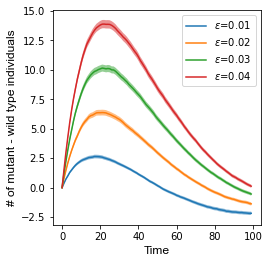

In [11]:

C = np.arange(0, t_m, 1, dtype=int)
fig1, ax = plt.subplots(figsize=(6,6))
l1, = ax.plot(C, mean_diff[0])
ax.fill_between(range(t_m), mean_diff[0] - 3.0 * std_diff[0] / np.sqrt(number_of_repetitions), mean_diff[0] + 3.0 * std_diff[0] / np.sqrt(number_of_repetitions), alpha=0.5)

l2, = ax.plot(C, mean_diff[1])
ax.fill_between(range(t_m), mean_diff[1] - 3.0 * std_diff[1] / np.sqrt(number_of_repetitions), mean_diff[1] + 3.0 * std_diff[1] / np.sqrt(number_of_repetitions), alpha=0.5)

l3, = ax.plot(C, mean_diff[2])
ax.fill_between(range(t_m), mean_diff[2] - 3.0 * std_diff[2] / np.sqrt(number_of_repetitions), mean_diff[2] + 3.0 * std_diff[2] / np.sqrt(number_of_repetitions), alpha=0.5)

l4, = ax.plot(C, mean_diff[3])
ax.fill_between(range(t_m), mean_diff[3] - 3.0 * std_diff[3] / np.sqrt(number_of_repetitions), mean_diff[3] + 3.0 * std_diff[3] / np.sqrt(number_of_repetitions), alpha=0.5)



ax.legend((l1,l2,l3,l4),('$\epsilon$=0.01', '$\epsilon$=0.02', '$\epsilon$=0.03','$\epsilon$=0.04'));
afont = {'fontname':'Arial'}
ax.set_xlabel("Time",fontsize = 12,**afont);
ax.set_ylabel("# of mutant - wild type individuals",fontsize = 12,**afont);

x_size = 10
plt.rc('xtick',labelsize=x_size)
y_size = 10
plt.rc('ytick',labelsize=y_size)

fig1.tight_layout()

figure = plt.gcf()
figure.set_size_inches(3.42, 3.42)
plt.savefig('RA_PNAS_fig2_Frontinella.pdf', dpi = 1200, bbox_inches="tight");